In [8]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
import matplotlib.pyplot as plt

In [10]:
data_path = 'weather.csv' 
data = pd.read_csv(data_path)

In [15]:
#histogram numeric manual
def hitung_histogram_manual(data, bins=10):
    hist_data = {}
    for kolom in data.select_dtypes(include=['number']).columns:
        kolom_data = data[kolom].dropna().tolist()
        min_val = min(kolom_data)
        max_val = max(kolom_data)
        bin_width = (max_val - min_val) / bins
        bin_edges = [min_val + i * bin_width for i in range(bins + 1)]
        bin_counts = [0] * bins

        for value in kolom_data:
            for i in range(bins):
                if bin_edges[i] <= value < bin_edges[i + 1]:
                    bin_counts[i] += 1
                    break
                elif value == bin_edges[-1]:  #masih ragu di bagian ini
                    bin_counts[-1] += 1

        hist_data[kolom] = (bin_edges, bin_counts)
    return hist_data

def visualisasi_histogram_manual(hist_data):
    for kolom, (bin_edges, bin_counts) in hist_data.items():
        plt.figure(figsize=(10, 5))
        plt.bar(bin_edges[:-1], bin_counts, width=bin_edges[1] - bin_edges[0], edgecolor='black', align='edge')
        plt.title(f'Histogram {kolom}')
        plt.xlabel(kolom)
        plt.ylabel('Frekuensi')
        plt.show()

# hist_data = hitung_histogram_manual(data, bins=10)
# visualisasi_histogram_manual(hist_data)

In [16]:
#bocplot numeric manual

def hitung_boxplot_manual(data):
    boxplot_data = {}
    for kolom in data.select_dtypes(include=['number']).columns:
        kolom_data = sorted(data[kolom].dropna().tolist())
        n = len(kolom_data)
        median = kolom_data[n // 2] if n % 2 != 0 else (kolom_data[n // 2 - 1] + kolom_data[n // 2]) / 2
        q1 = kolom_data[n // 4]
        q3 = kolom_data[(3 * n) // 4]
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = [x for x in kolom_data if x < lower_bound or x > upper_bound]
        
        boxplot_data[kolom] = {
            'median': median,
            'q1': q1,
            'q3': q3,
            'iqr': iqr,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outliers': outliers
        }
    return boxplot_data

def visualisasi_boxplot_manual(boxplot_data):
    for kolom, stats in boxplot_data.items():
        plt.figure(figsize=(10, 5))
        plt.boxplot([data[kolom].dropna()], vert=False)
        plt.title(f'Box Plot {kolom}')
        plt.xlabel(kolom)
        plt.show()

In [19]:
def visualisasi_histogram_string_manual(data):
    for kolom in data.select_dtypes(include=['object']).columns:
        kolom_data = data[kolom].dropna().tolist()
        frekuensi = {}
        
        for item in kolom_data:
            if item in frekuensi:
                frekuensi[item] += 1
            else:
                frekuensi[item] = 1
        
        plt.figure(figsize=(10, 5))
        plt.bar(frekuensi.keys(), frekuensi.values(), edgecolor='black')
        plt.title(f'Histogram {kolom}')
        plt.xlabel(kolom)
        plt.ylabel('Frekuensi')
        plt.xticks(rotation=45)
        plt.show()

In [21]:
def visualisasi_histogram_library(data):
    for kolom in data.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(10, 5))
        data[kolom].dropna().plot(kind='hist', bins=10, edgecolor='black')
        plt.title(f'Histogram {kolom}')
        plt.xlabel(kolom)
        plt.ylabel('Frekuensi')
        plt.show()

def visualisasi_boxplot_library(data):
    for kolom in data.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(10, 5))
        data[kolom].dropna().plot(kind='box', vert=False)
        plt.title(f'Box Plot {kolom}')
        plt.xlabel(kolom)
        plt.show()

def visualisasi_histogram_string_library(data):
    for kolom in data.select_dtypes(include=['object']).columns:
        plt.figure(figsize=(10, 5))
        data[kolom].value_counts().plot(kind='bar', edgecolor='black')
        plt.title(f'Histogram {kolom}')
        plt.xlabel(kolom)
        plt.ylabel('Frekuensi')
        plt.xticks(rotation=45)
        plt.show()

In [22]:
hist_data = hitung_histogram_manual(data, bins=10)
boxplot_data = hitung_boxplot_manual(data)

Visualisasi Histogram dan Box Plot Manual:


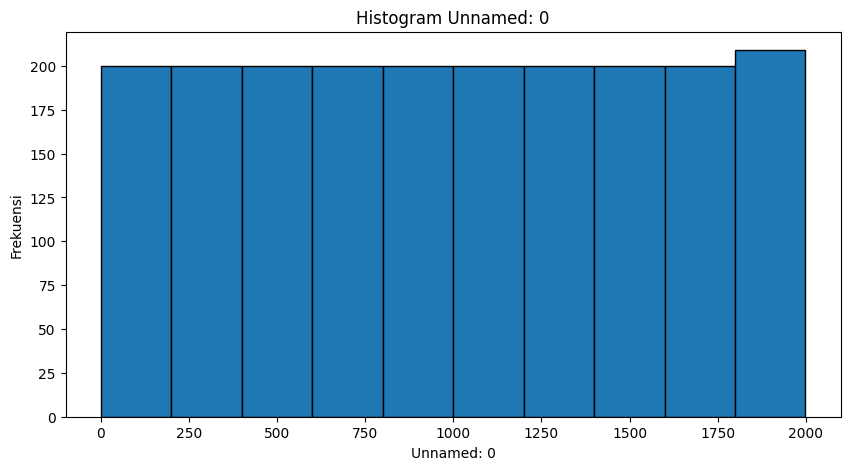

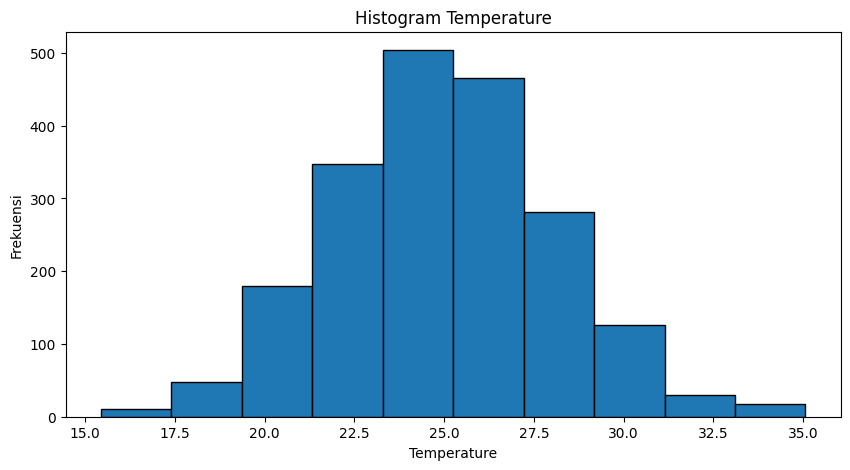

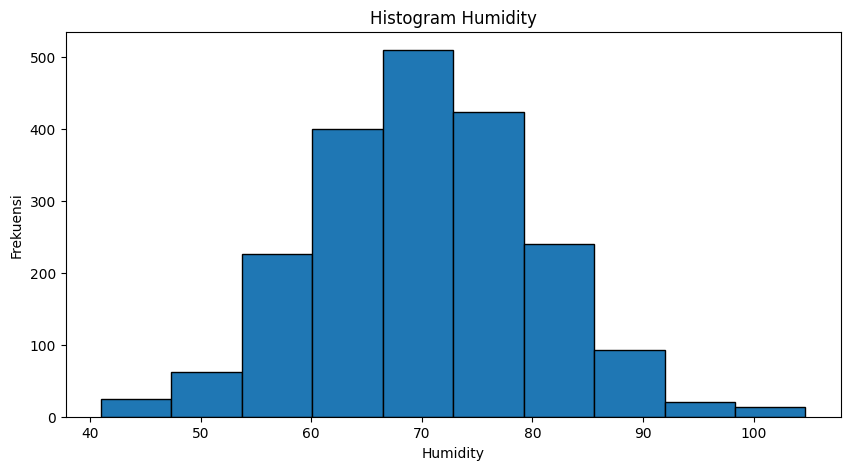

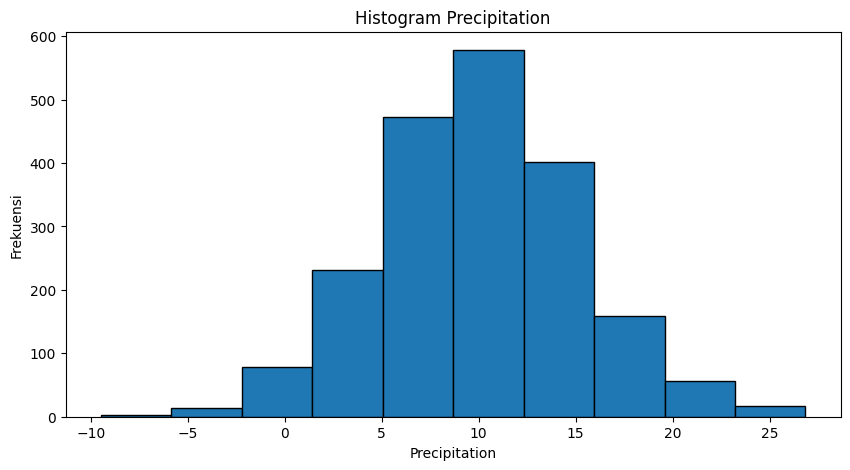

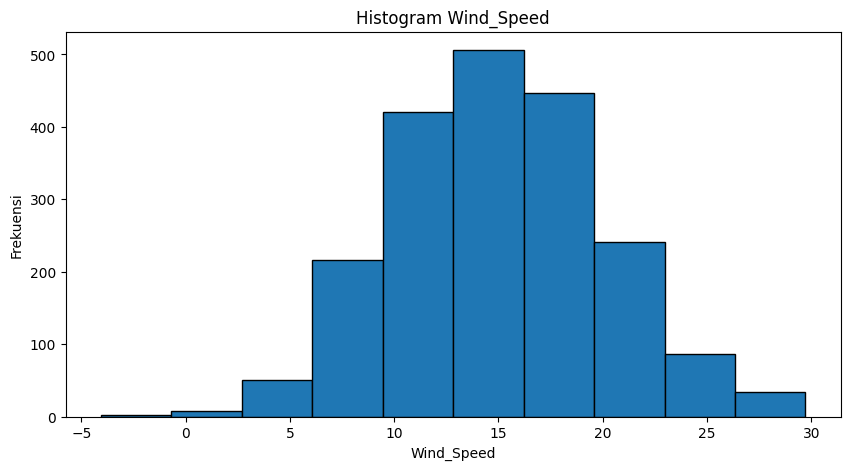

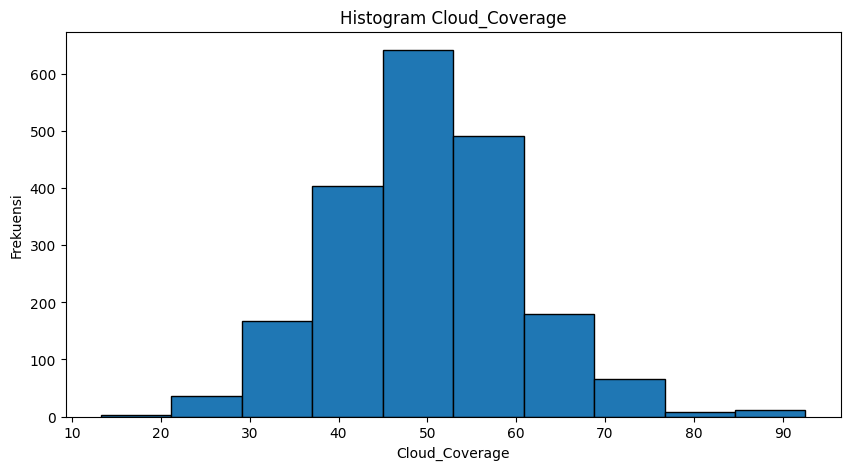

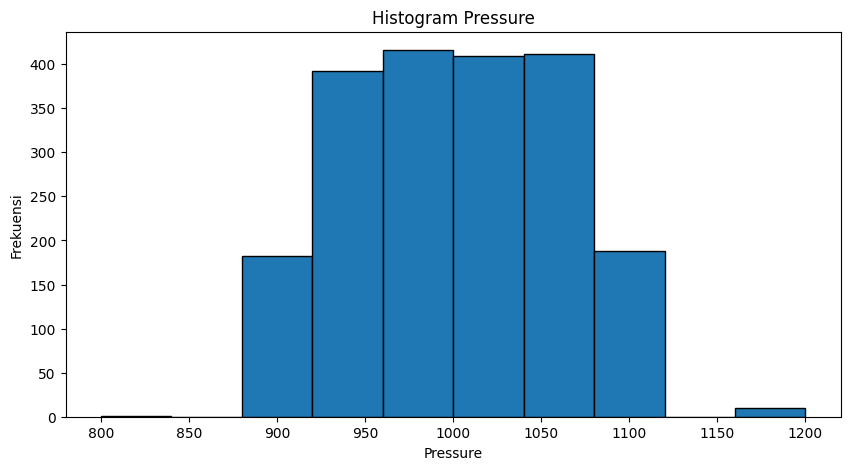

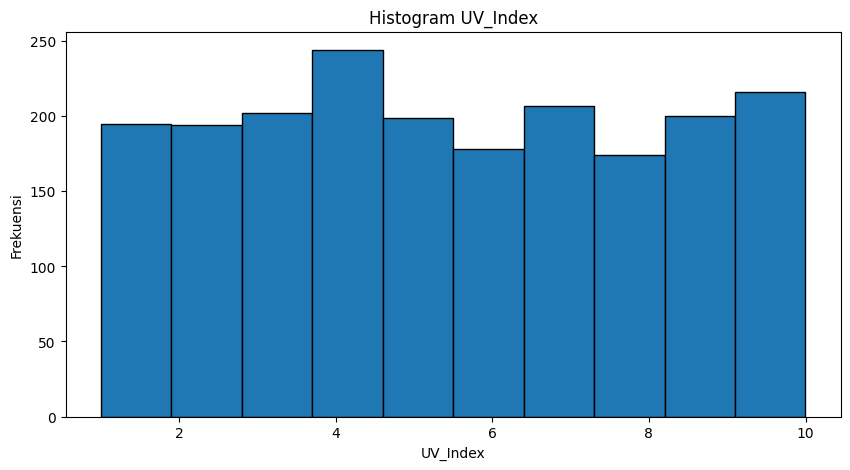

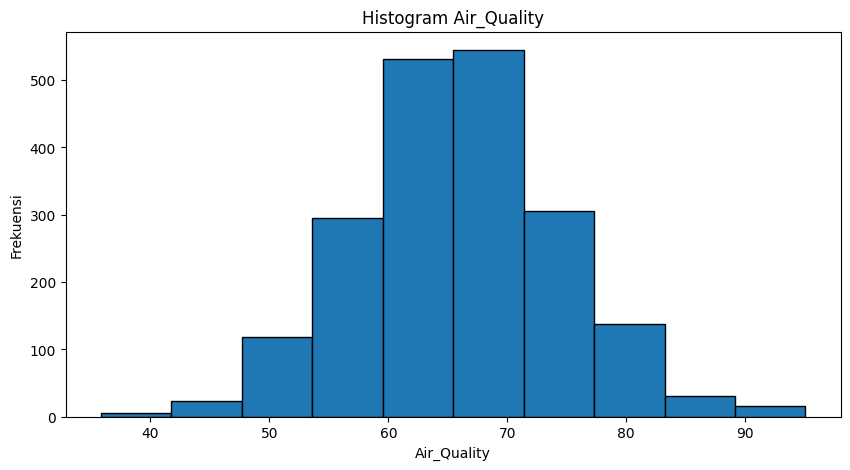

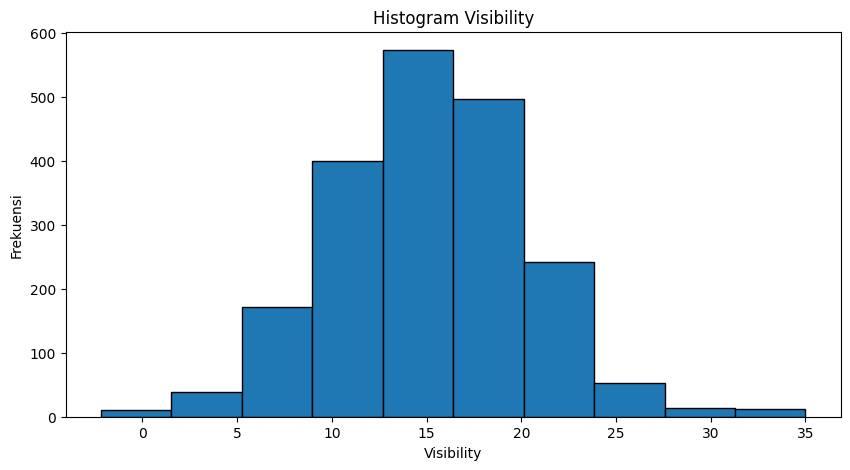

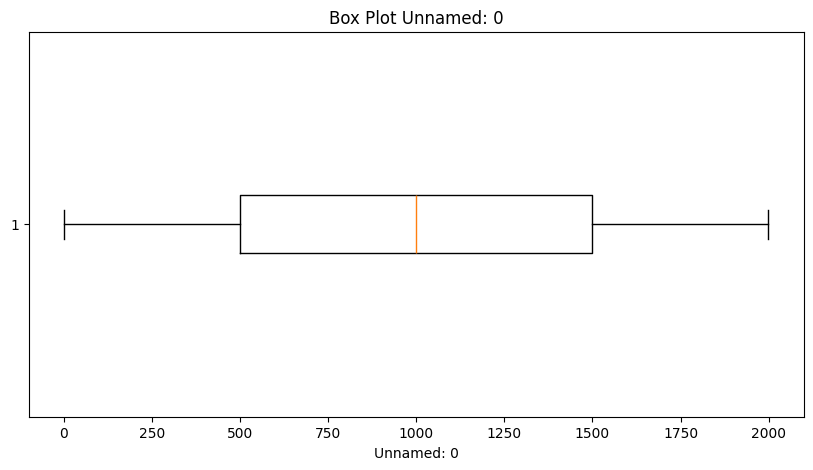

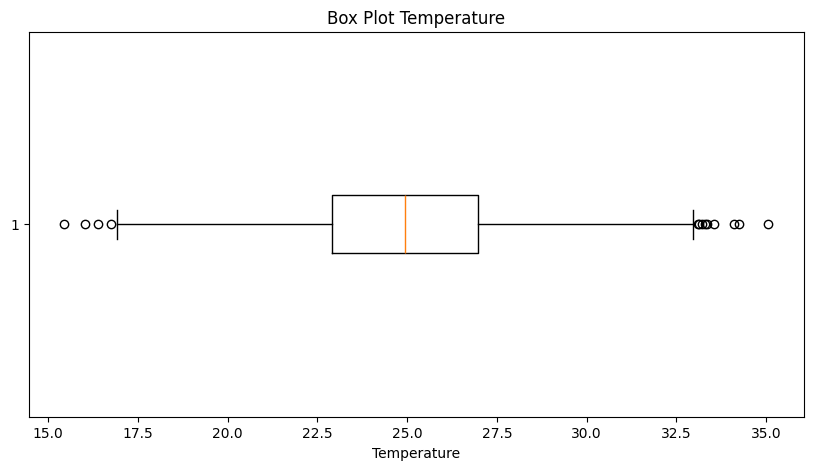

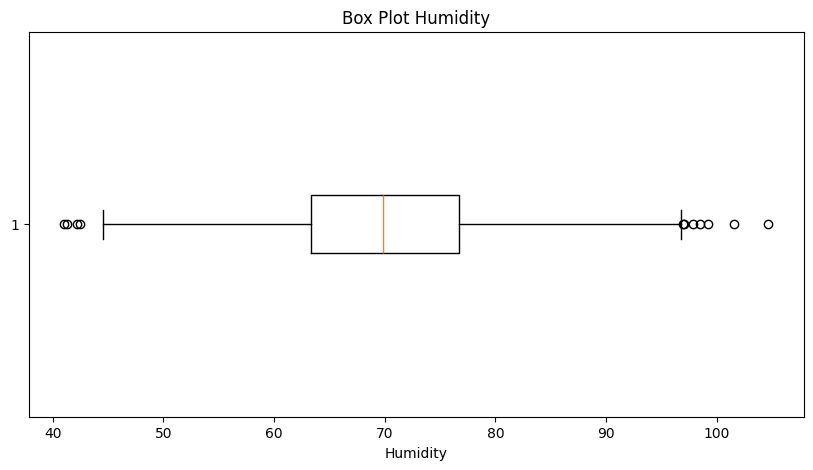

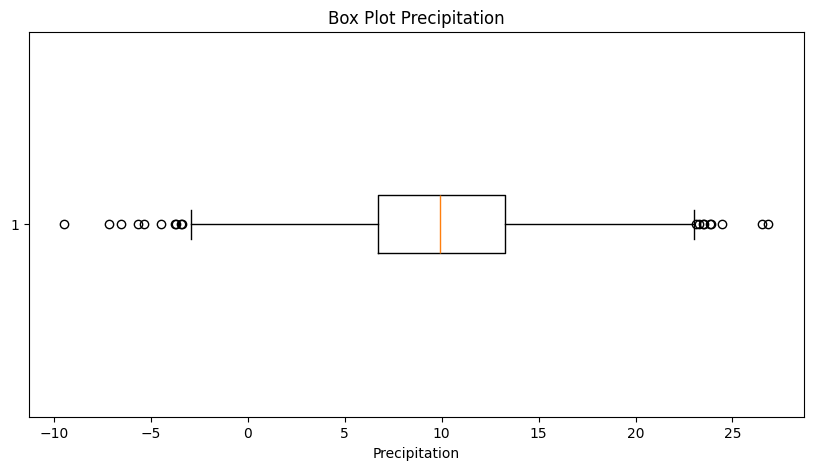

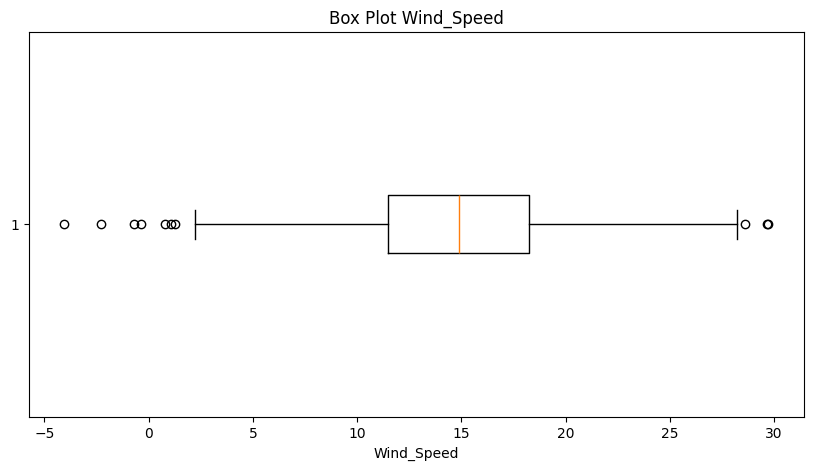

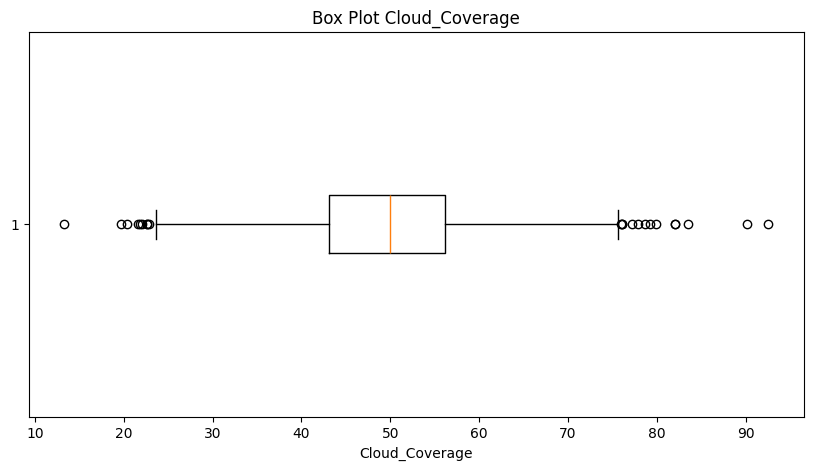

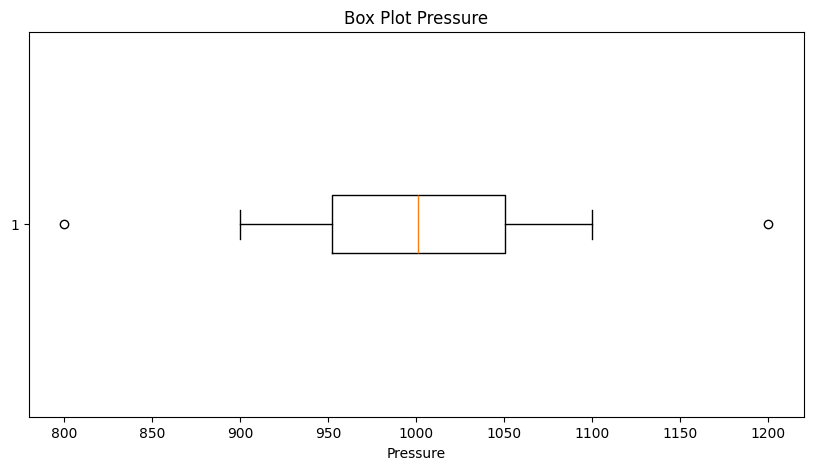

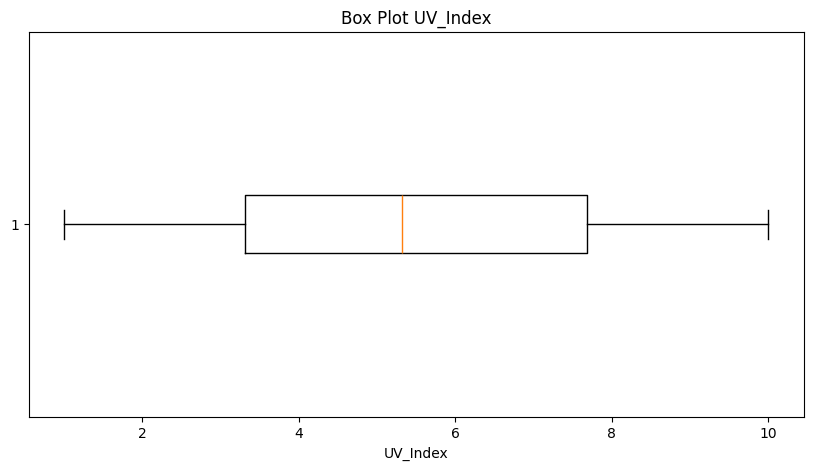

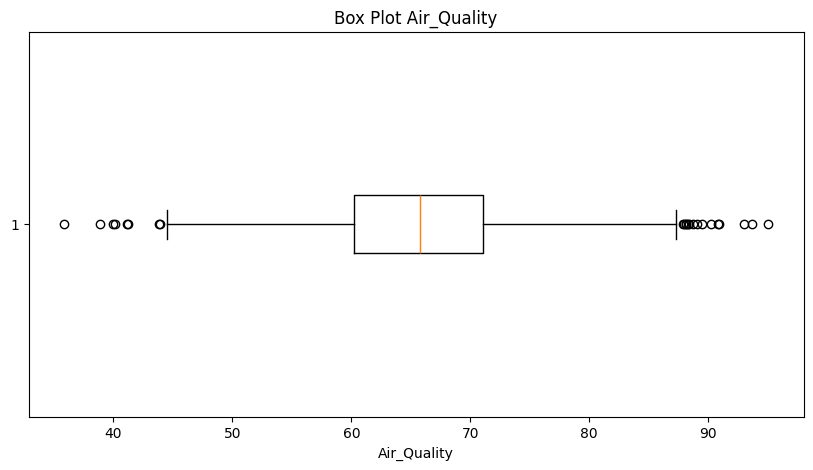

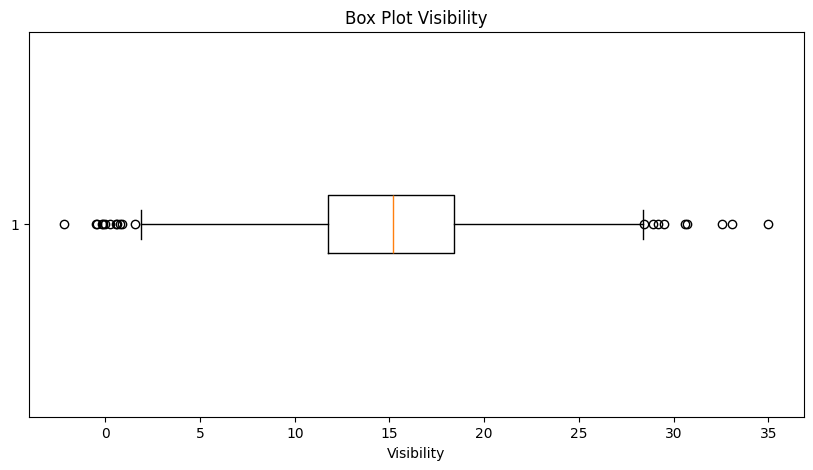

In [24]:
print("Visualisasi Histogram dan Box Plot Manual:")
visualisasi_histogram_manual(hist_data)
visualisasi_boxplot_manual(boxplot_data)

Visualisasi Histogram dan Box Plot Menggunakan Library:


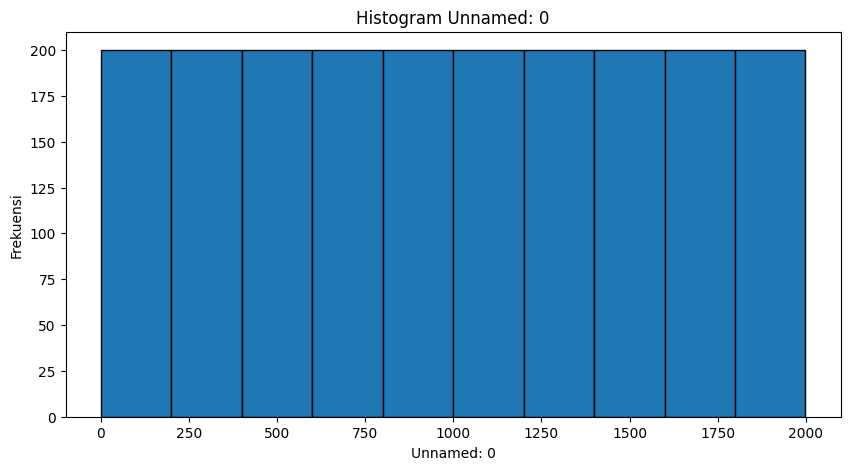

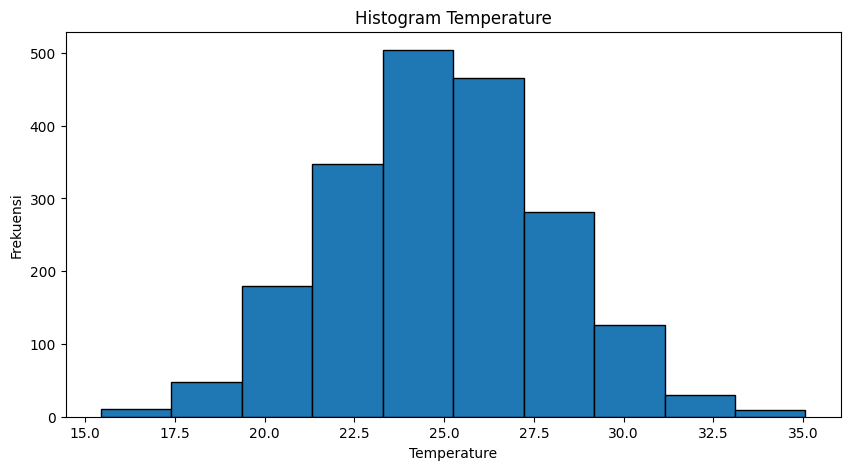

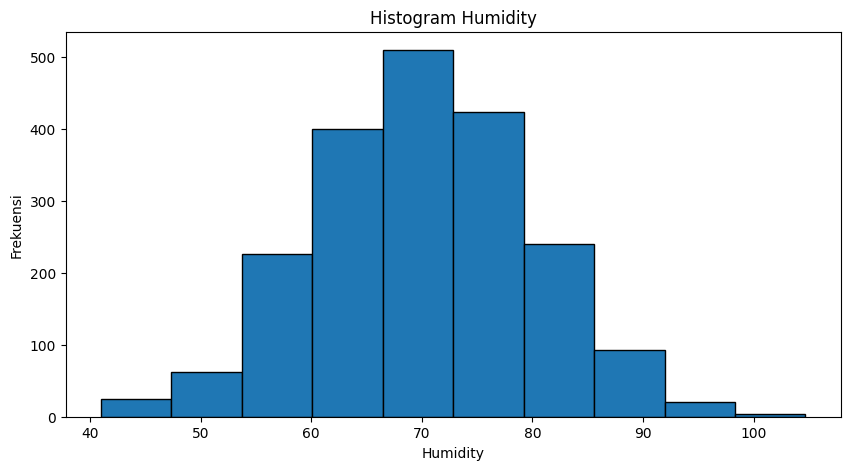

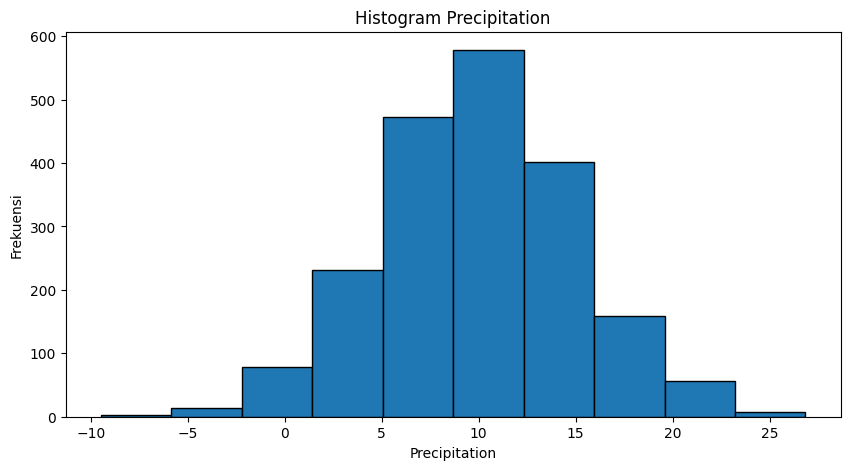

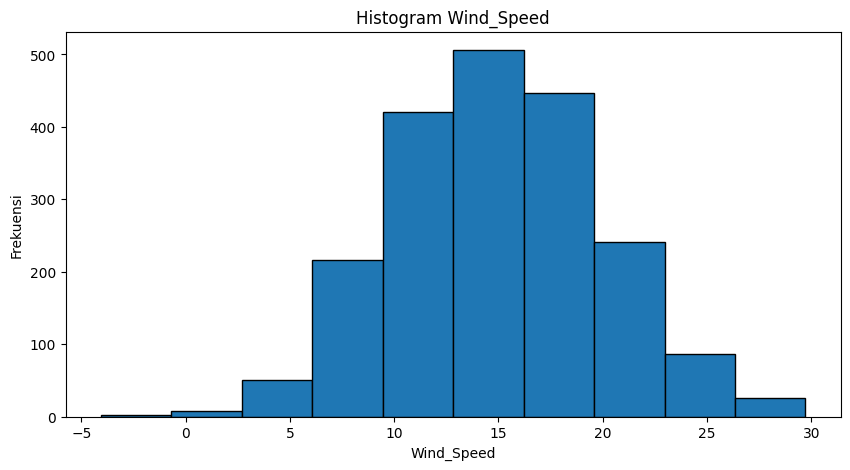

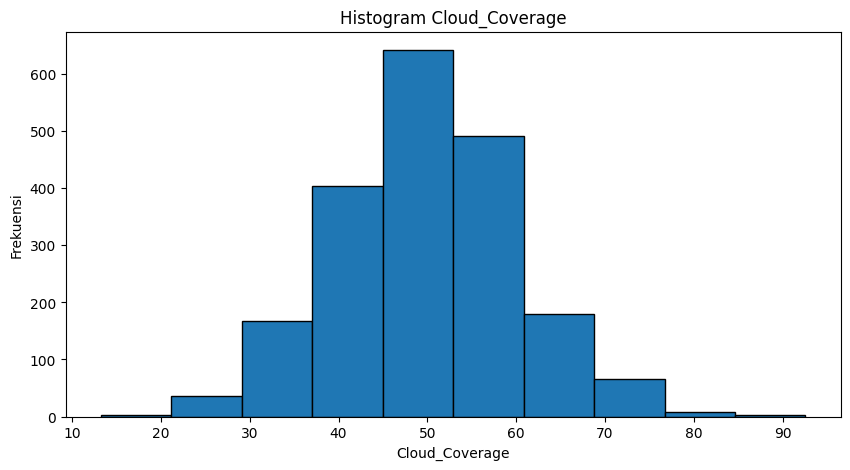

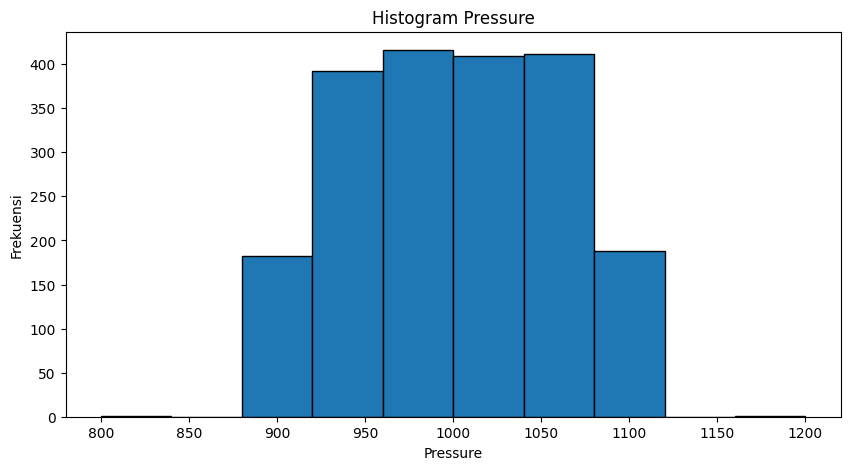

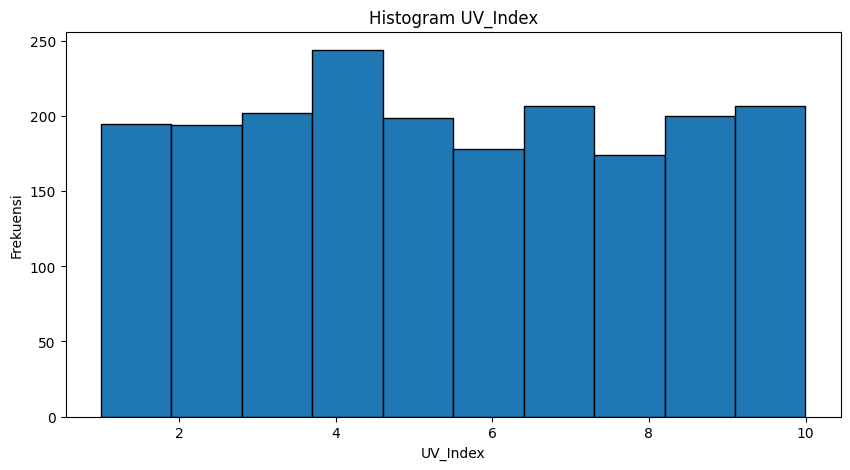

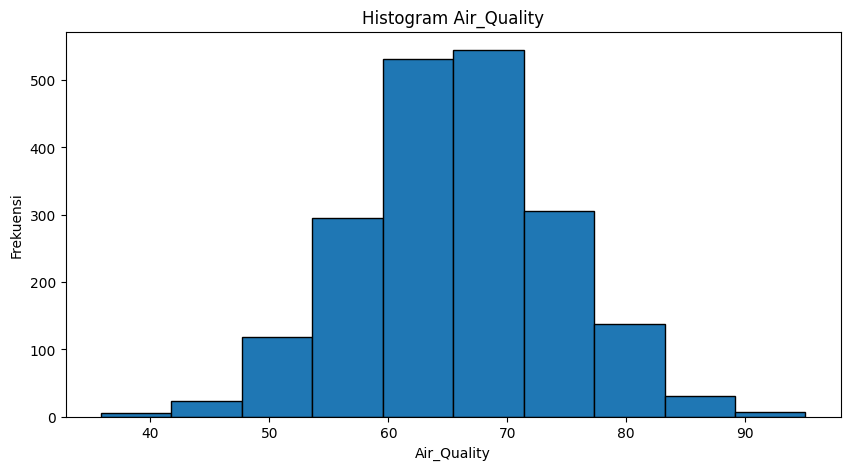

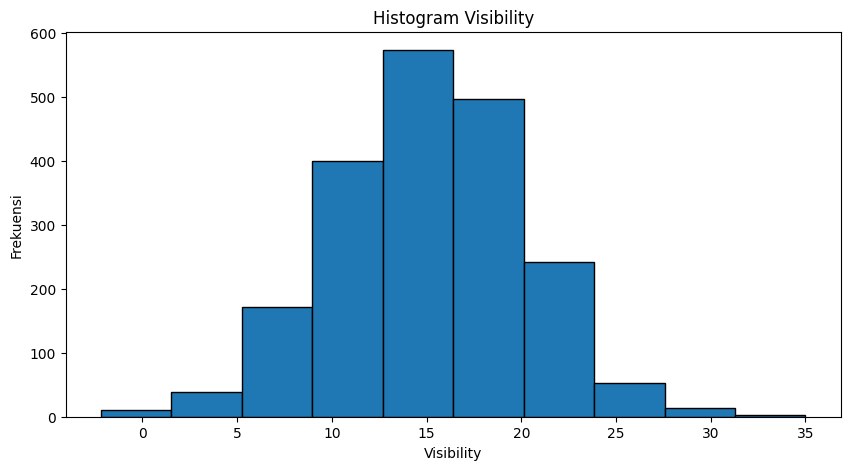

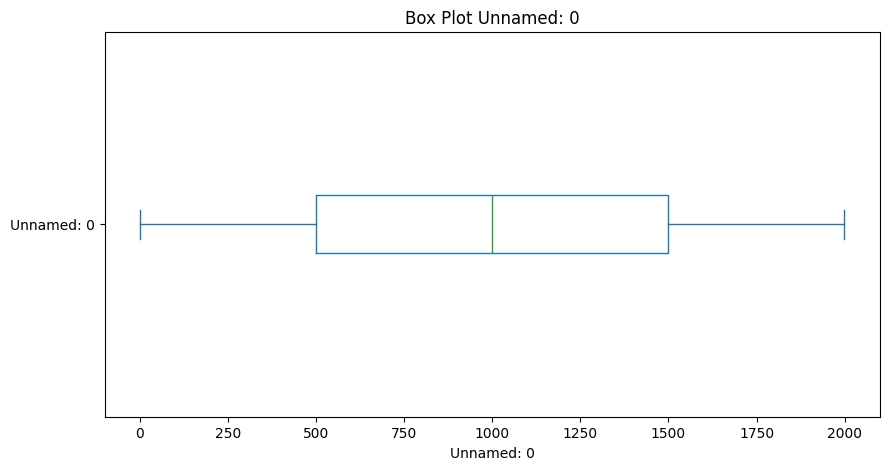

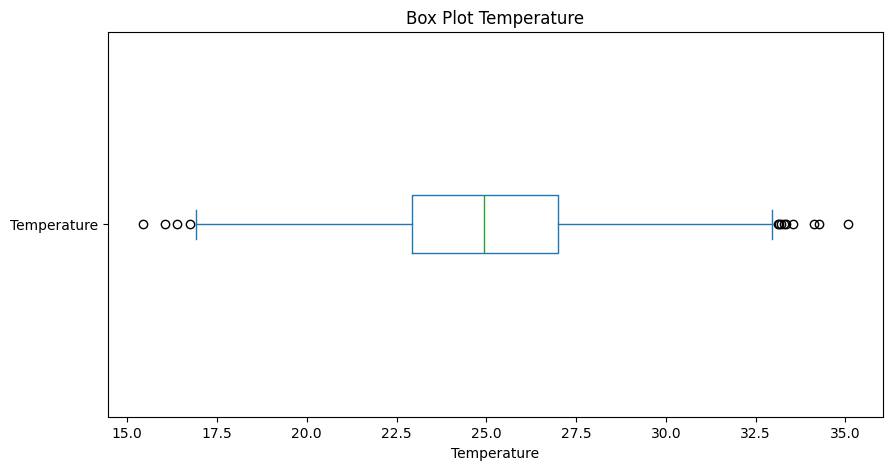

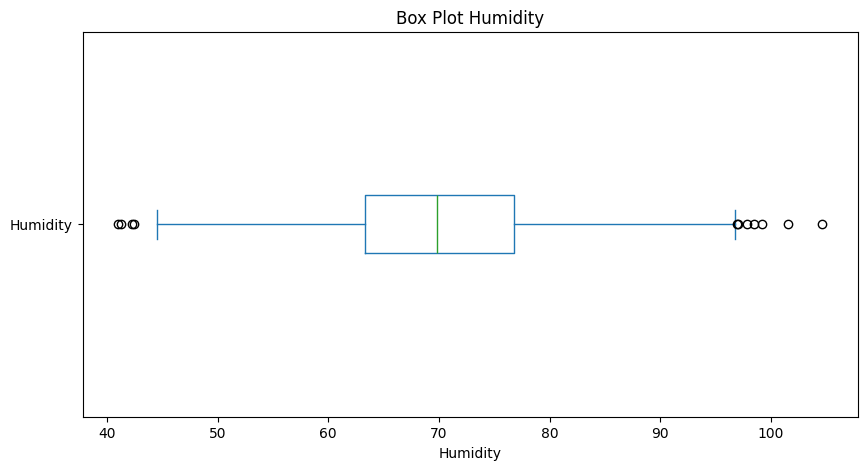

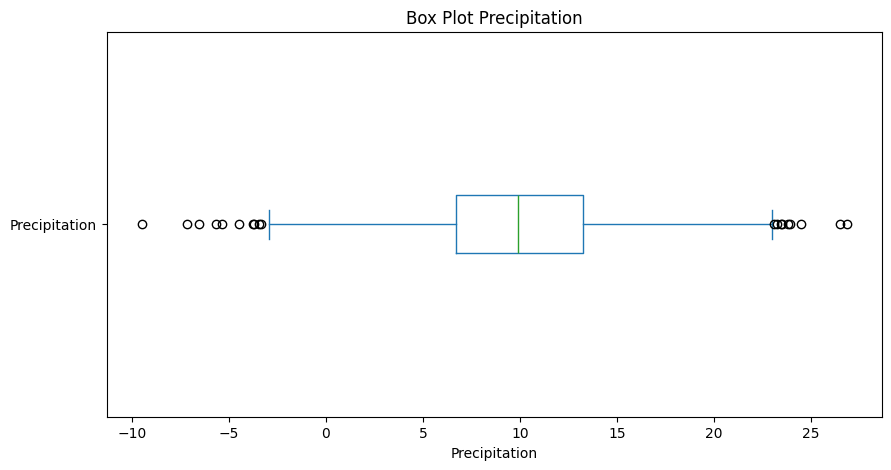

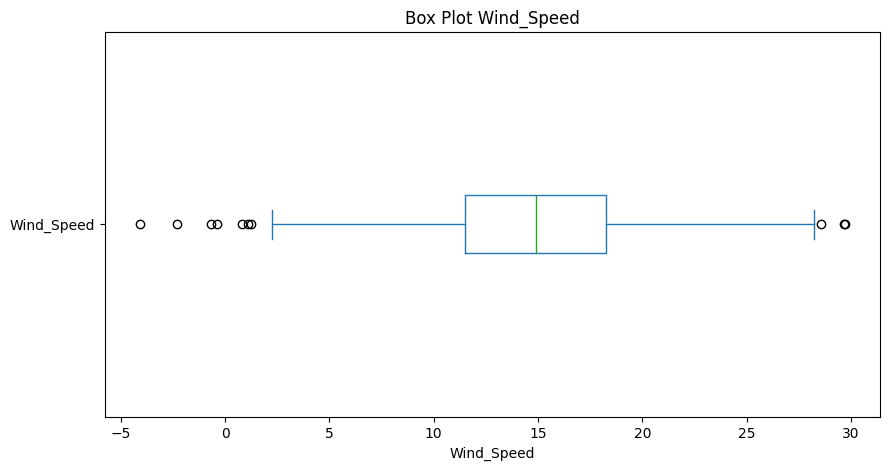

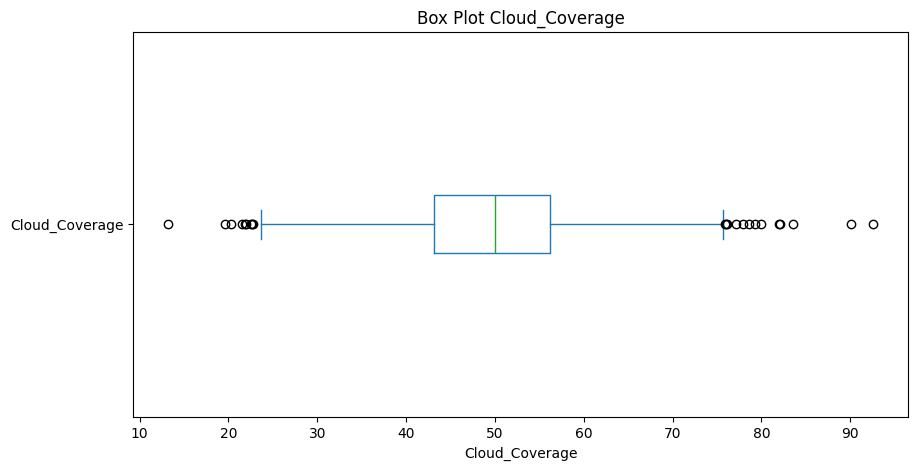

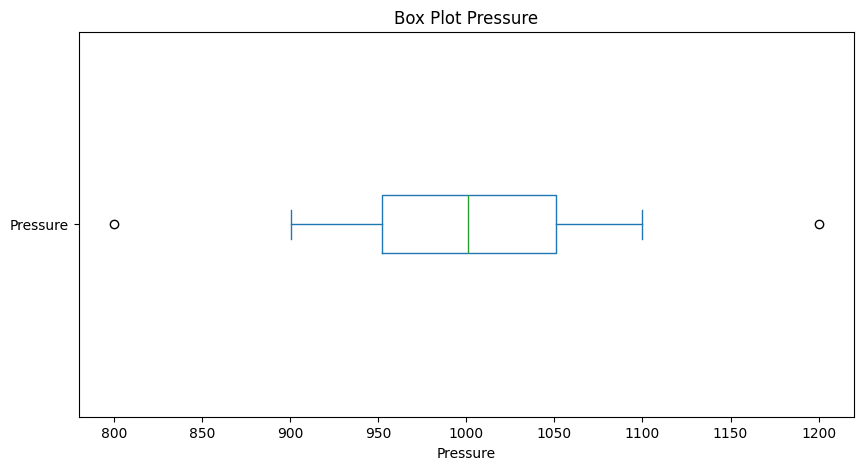

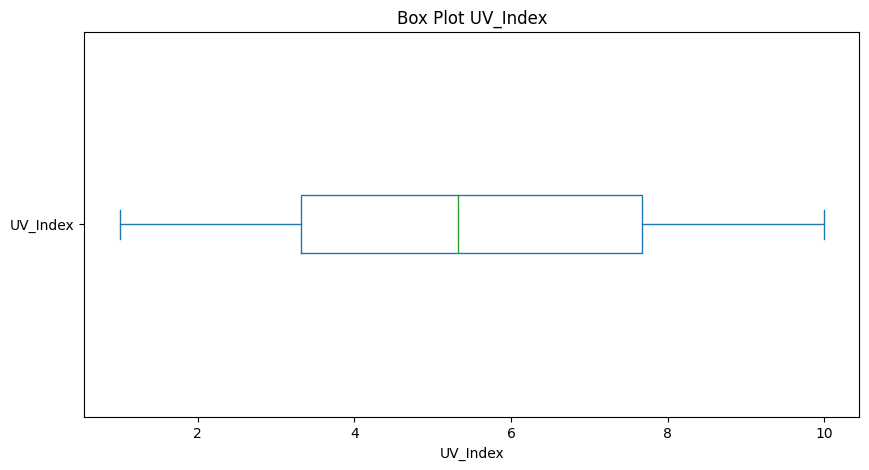

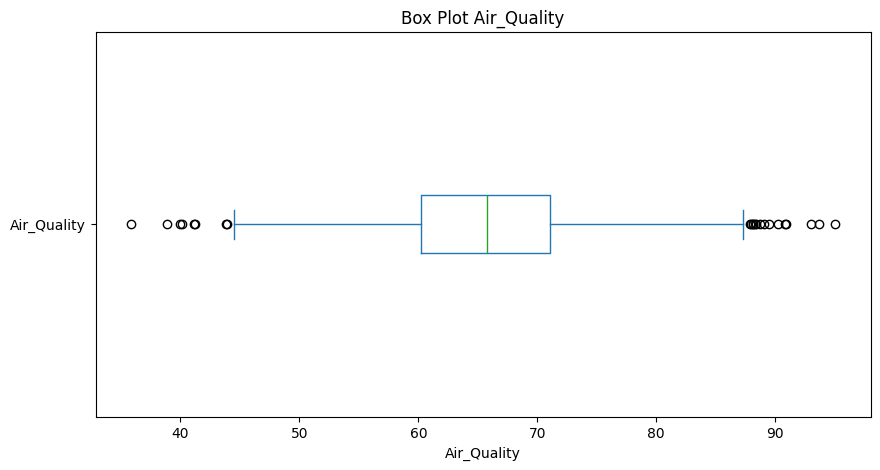

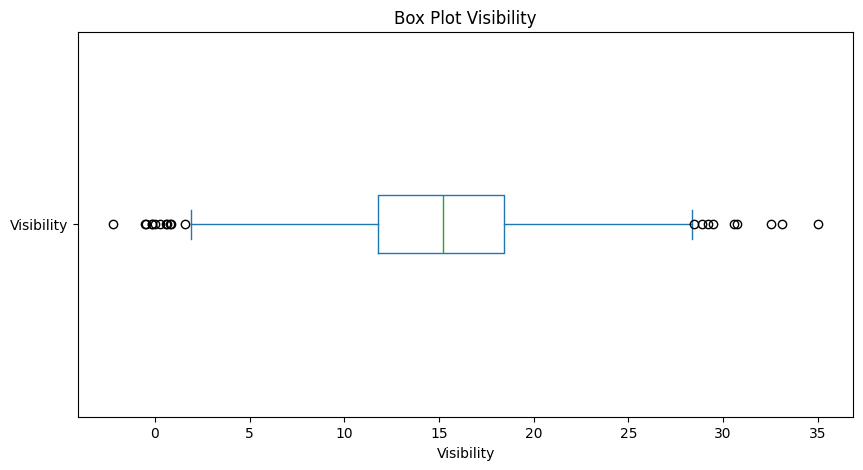

In [25]:
print("Visualisasi Histogram dan Box Plot Menggunakan Library:")
visualisasi_histogram_library(data)
visualisasi_boxplot_library(data)

Visualisasi Histogram String Manual:


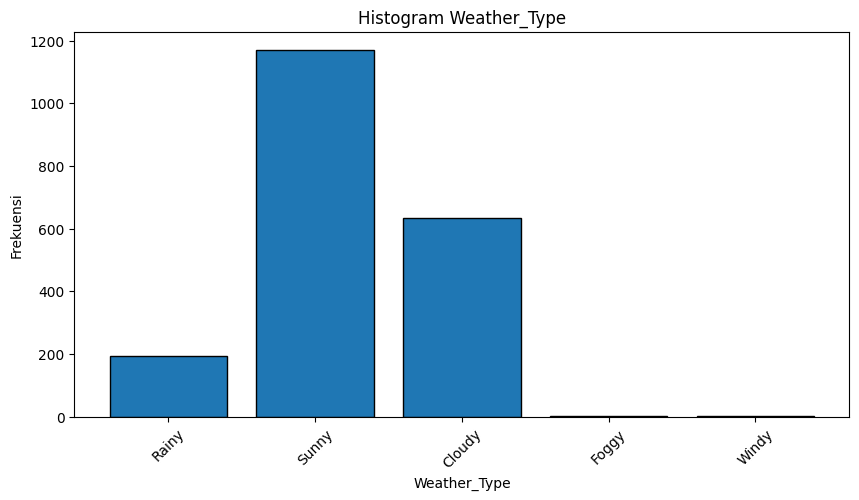

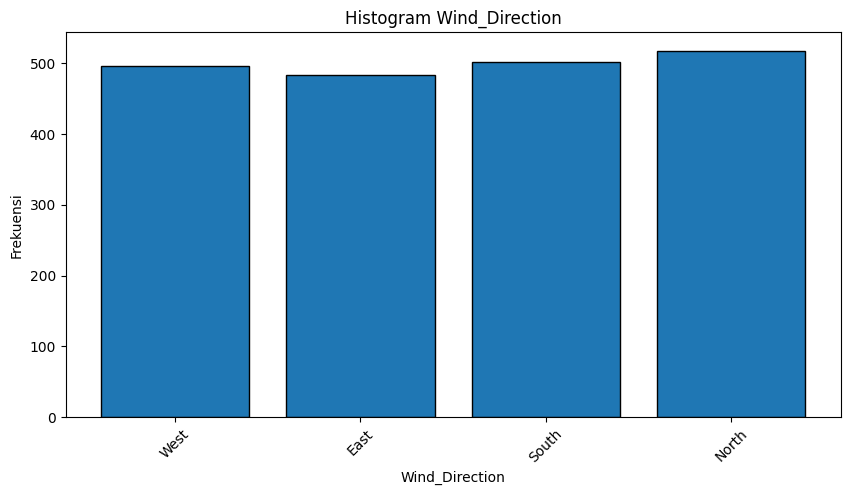

In [26]:
print("Visualisasi Histogram String Manual:")
visualisasi_histogram_string_manual(data)

Visualisasi Histogram String Menggunakan Library:


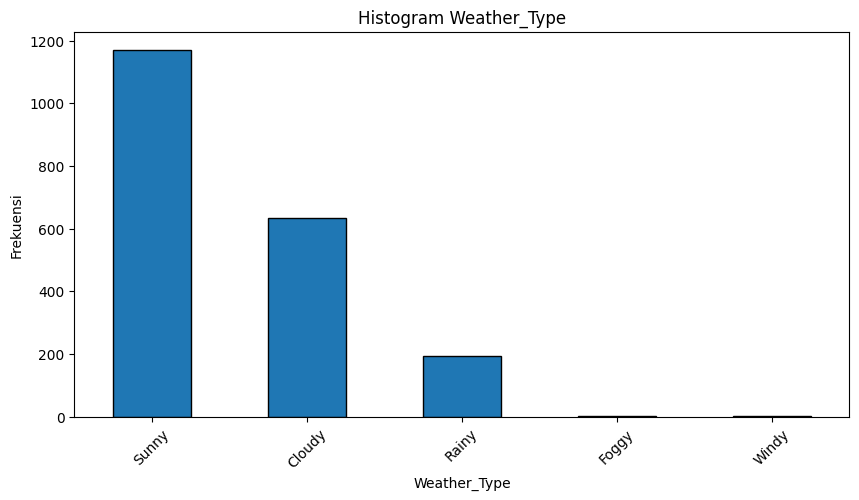

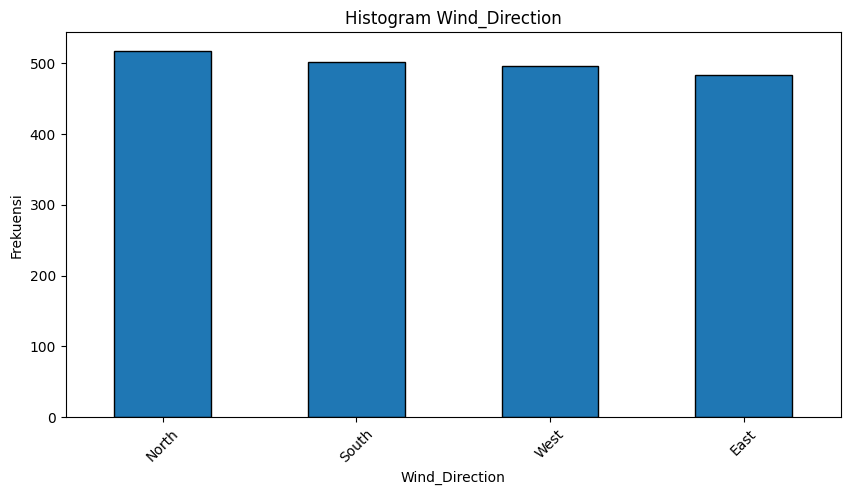

In [27]:
print("Visualisasi Histogram String Menggunakan Library:")
visualisasi_histogram_string_library(data)